# CSC 593

## Week 8

### `pyplot`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
data = np.arange(11)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

[`numpy.arange()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) is the same as the built-in `range()` function, but returns a Numpy Array instead of a list. The main difference is that we can easily do math operations on each item in the array. 

In [3]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [4]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

In [5]:
np.array([1,2,3])+np.array([4,5,6])

array([5, 7, 9])

#### `plot()`

`plot` is pyplot's basic plotting function. It's flexible, and creates basic graphs easily, and can do more complex graphs.

We can use [pyplot's `plot()` function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to generate basic plots, or to build more complex plots from scratch.

In [6]:
#Plot y = (x^2)/2
datax = data
datay = 3+(data**2)/2
datay

array([ 3. ,  3.5,  5. ,  7.5, 11. , 15.5, 21. , 27.5, 35. , 43.5, 53. ])

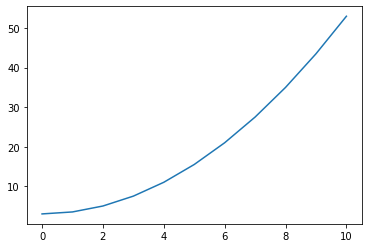

In [7]:
plt.plot(datax, datay)
plt.show()

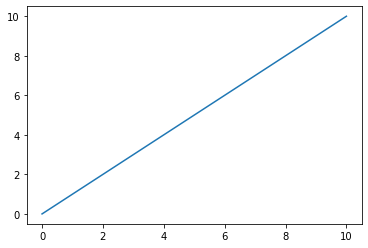

In [8]:
#The same as plt.plot(range(data.size), data)
plt.plot(data)
plt.show()

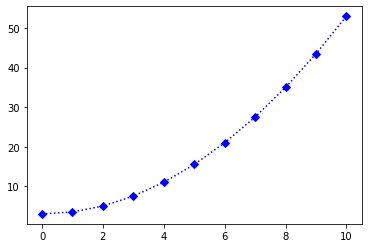

In [9]:
# These format strings ('D:b') are explained in depth at
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
plt.plot(datax, datay, 'D:b')
plt.show()

In [10]:
mydata = pd.DataFrame({'x':datax, 'y':datay})
mydata.head()

,x,y
0,0,3.0
1,1,3.5
2,2,5.0
3,3,7.5
4,4,11.0


For simple plots, we can just use the [DataFrame's or Series's `plot()` method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html):

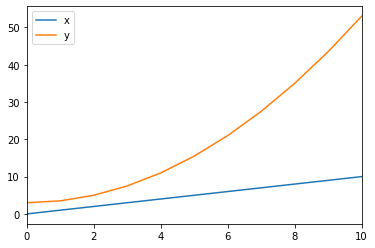

In [11]:
#The `kind` parameter will give you different kinds of plots.
mydata.plot()
plt.show()

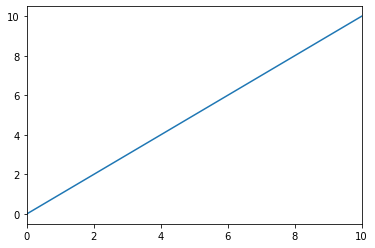

In [12]:
mydata.x.plot()

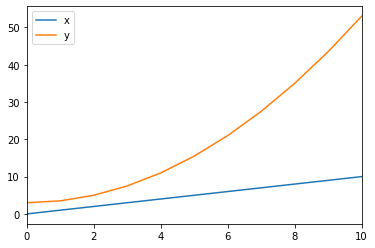

In [13]:
mydata[['x','y']].plot()

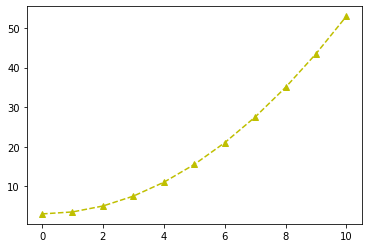

In [14]:
plt.plot('x', 'y', 'y--^', data=mydata)
plt.show()

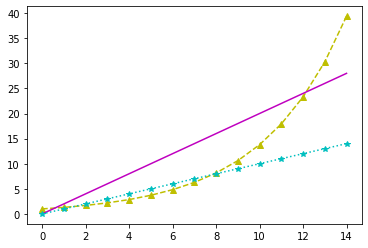

In [15]:
plt.plot(np.arange(15), pd.Series(np.arange(15)).apply(lambda x: 1.3**x), 'y--^')
plt.plot(np.arange(15), np.arange(15)*2, 'm-')
plt.plot(np.arange(15), 'c:*')
plt.show()

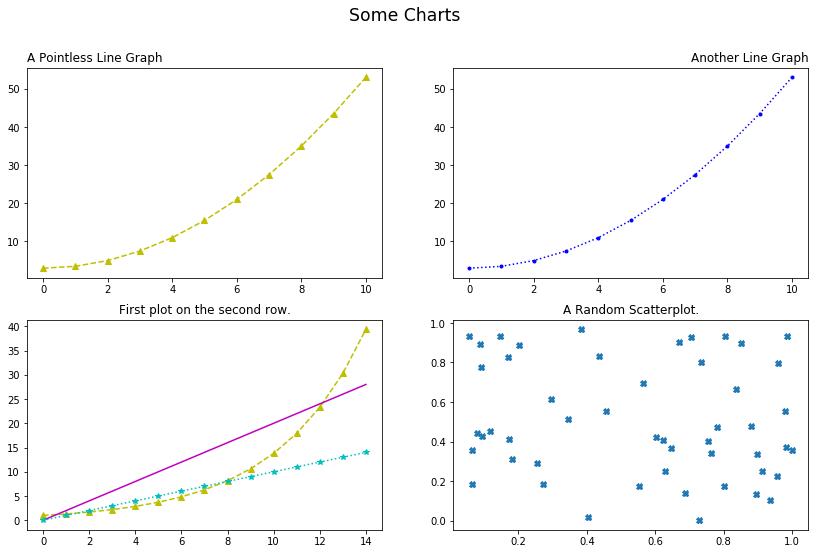

In [16]:
import random
np.random.seed(57723887)

fig, axs = plt.subplots(2, 2, figsize=(14, 8.5))

axs[0][0].plot('x', 'y', 'y--^', data=mydata)
axs[0][0].set_title('A Pointless Line Graph', loc="left")

axs[0][1].plot(datax, datay, 'b:.')
axs[0][1].set_title("Another Line Graph", loc="right")

axs[1][0].plot(np.arange(15), pd.Series(np.arange(15)).apply(lambda x: 1.3**x), 'y--^')
axs[1][0].plot(np.arange(15), np.arange(15)*2, 'm-')
axs[1][0].plot(np.arange(15), 'c:*')
axs[1][0].set_title("First plot on the second row.")

axs[1][1].plot(np.random.rand(50), np.random.rand(50), 'X')
axs[1][1].set_title("A Random Scatterplot.")

plt.suptitle('Some Charts', size='xx-large')

plt.show()

This just makes sure all our random scatterplots look the same:  

`np.random.seed(57723887)`

Create a _figure_ (a kind of foundation that can contain one or more plots) with 4 subplots (a 2x2 grid). Make it 14" wide by 8.5" tall.  

`fig, axs = plt.subplots(2, 2, figsize=(14, 8.5))`

`plt.subplots()` returns a tuple with two items. The first is the figure itself, which we've assigned to `fig`. The second is the four subplots; those are called _Axes_ within matplotlib so we're assigning them to `axs`.

`axs` is actually a two-dimensional array: `axs[0]` is the first row, with two subelements; `axs[1]` is the same.


Here we create a graph in the the first subplot (the top left), then set its title.

`axs[0][0].plot('x', 'y', 'y--^', data=mydata)
axs[0][0].set_title('A Pointless Line Graph', loc="left")`

Do the same in the top right, but using a different line and dot style.

`axs[0][1].plot(datax, datay, 'b:.')
axs[0][1].set_title("Another Line Graph", loc="right")`

Draw three lines in the bottom left plot and create a random scatterplot in the last subplot:

`axs[1][0].plot(np.arange(15), pd.Series(np.arange(15)).apply(lambda x: 1.3**x), 'y--^')
axs[1][0].plot(np.arange(15), np.arange(15)*2, 'm-')
axs[1][0].plot(np.arange(15), 'c:*')
axs[1][0].set_title("First plot on the second row.")

axs[1][1].plot(np.random.rand(50), np.random.rand(50), 'X')
axs[1][1].set_title("A Random Scatterplot.")`

Set a title for the figure as a whole, and make it larger than the individual subplots' titles.

`plt.suptitle('Some Charts', size='xx-large')`

Show the figure.

`plt.show()`

#### Practice

Try making a `figure` with at least two plots, either from your dataset, the `brfss` or `nhis` data we used in previous weeks, or one of the commented-out options below:

In [17]:
#sns.get_dataset_names()
#mpg = sns.load_dataset('mpg')
#tips = sns.load_dataset('tips')
#titanic = sns.load_dataset('titanic')

#### `scatter()`

In [18]:
#Load the `tips` dataset included with Seaborn. Transform some categorical variables to integers.
tips = sns.load_dataset('tips')
tips['sexcat'] = tips.sex.cat.rename_categories([0,1])#.astype(np.int8) 
tips['daynum'] = tips.day.cat.rename_categories([3,4,5,6])#.astype(np.int8)
tips['mealnum'] = tips.time.cat.rename_categories([1,0])#.astype(np.int8)
tips['msize'] = (tips['size'])**3
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sexcat,daynum,mealnum,msize
0,16.99,1.01,Female,No,Sun,Dinner,2,1,6,0,8
1,10.34,1.66,Male,No,Sun,Dinner,3,0,6,0,27
2,21.01,3.50,Male,No,Sun,Dinner,3,0,6,0,27
3,23.68,3.31,Male,No,Sun,Dinner,2,0,6,0,8
4,24.59,3.61,Female,No,Sun,Dinner,4,1,6,0,64


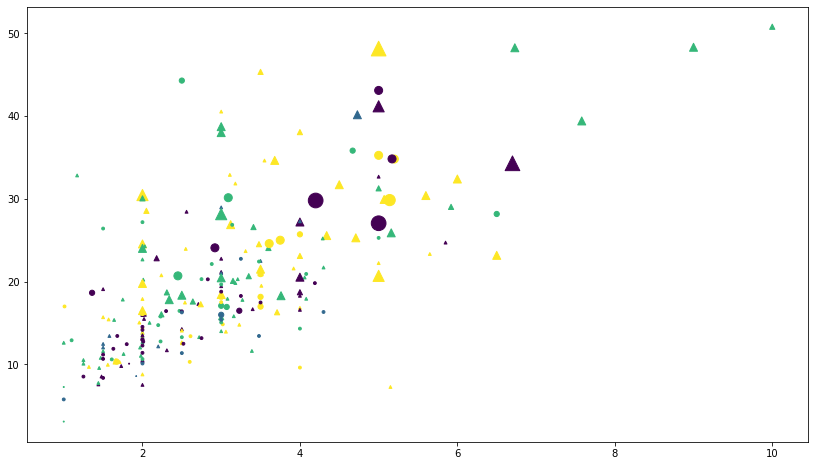

In [19]:
plt.figure(figsize=(14, 8))
plt.scatter('tip', 'total_bill', s='msize', c='daynum', marker='^', data=tips[tips['sex']=='Male'])
plt.scatter('tip', 'total_bill', s='msize', c='daynum', marker='o', data=tips[tips['sex']=='Female'])
plt.show()

**Note:** If you aren't using the `s` (size) and `c` (color) arguments, you can just as easily use `plot()` (it's a little faster).

**Note 2:** Don't make a plot like the above. It's hard to read for several reasons. (In particular, you should use shape OR size OR color, not all three).

What's happening here: We make a figure with only one subplot.

`plt.figure(figsize=(14, 8))`

Add two `scatter`plots to the figure. Assign `tip` and `total_bill` to `x` and `y` respectively; `msize` controls the size of the markers, and `daynum` controls the color. We can't assign a variable to marker, so to a different marker for each sex, we need to call `scatter` twice. 

`plt.scatter('tip', 'total_bill', 'tip', s='msize', c='daynum', marker='^', data=tips[tips['sex']=='Male'])
plt.scatter('tip', 'total_bill', s='msize', c='daynum', marker='o', data=tips[tips['sex']=='Female'])`

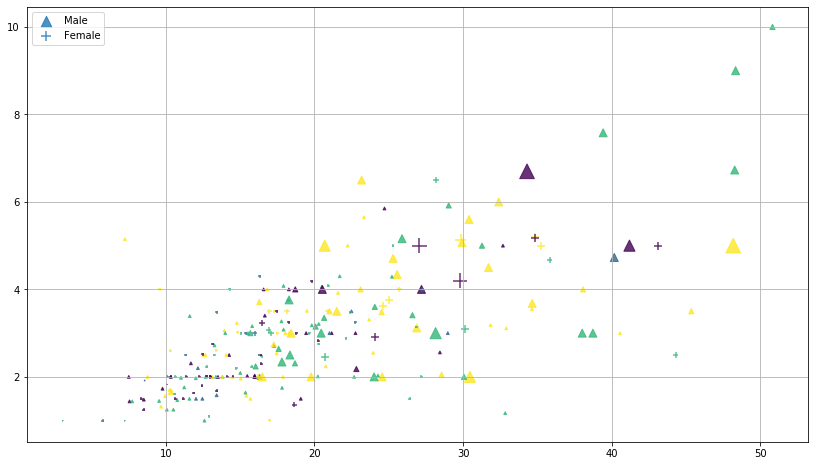

In [20]:
#There's a "Legend Guide" at https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
fig, ax = plt.subplots(figsize=(14,8))

ax.scatter('total_bill', 'tip', c='daynum', s='msize', label='Male',
           alpha=.8, marker='^', data=tips[tips['sex']=='Male'])

ax.scatter('total_bill', 'tip', c='daynum', s='msize', label='Female',
           alpha=.8, marker='+', data=tips[tips['sex']=='Female'])

ax.legend()
ax.grid(True)

plt.show()

https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

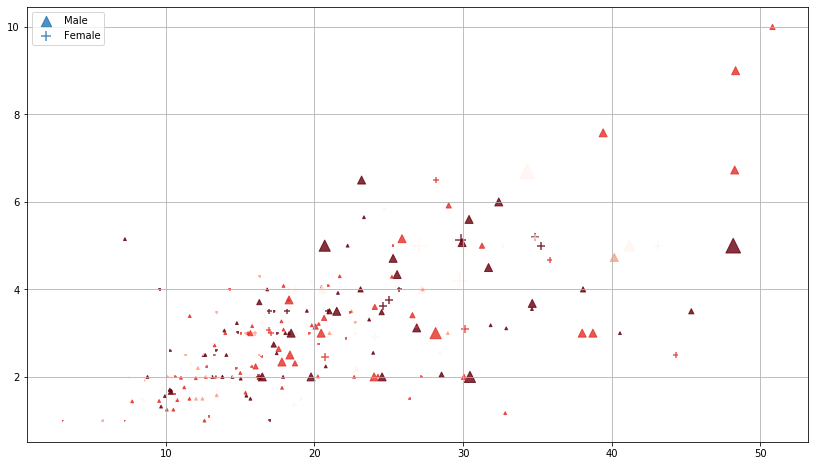

In [21]:
fig, ax = plt.subplots(figsize=(14,8))

ax.scatter('total_bill', 'tip', c='daynum', s='msize', label='Male',
           alpha=.8, marker='^', data=tips[tips['sex']=='Male'], cmap='Reds')

ax.scatter('total_bill', 'tip', c='daynum', s='msize', label='Female',
           alpha=.8, marker='+', data=tips[tips['sex']=='Female'], cmap='Reds')

ax.legend()
ax.grid(True)

plt.show()

#### `bar()`

In [22]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


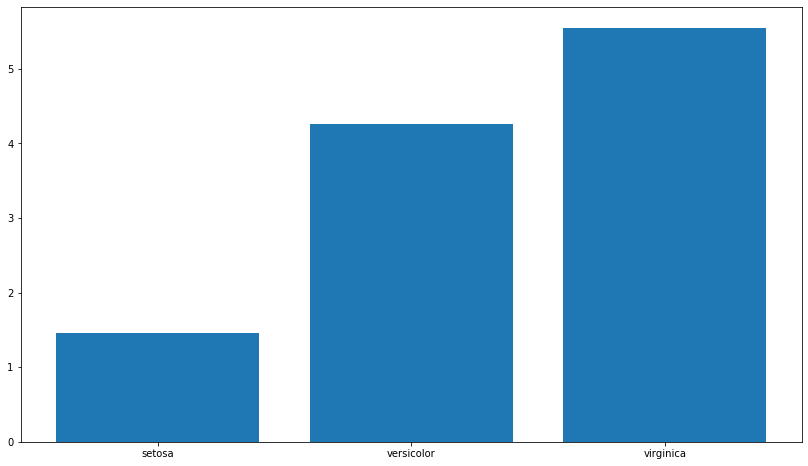

In [23]:
plen = iris.groupby('species').mean()['petal_length']
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(plen.index, plen)
plt.show()

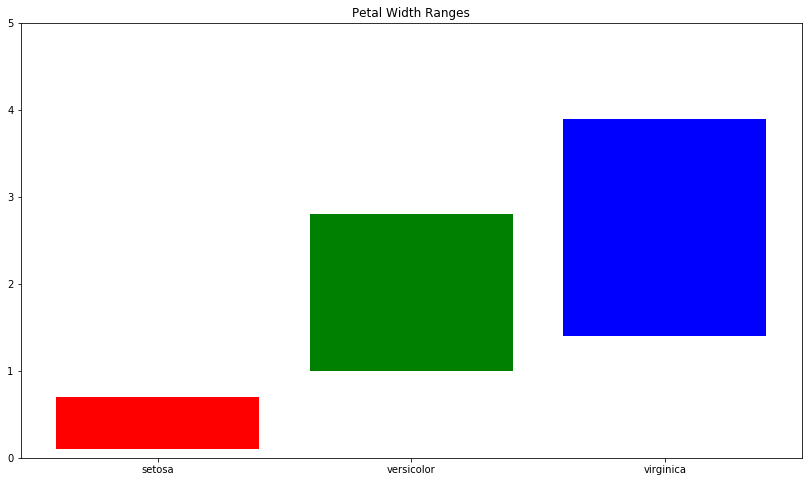

In [24]:
pmax = iris.groupby('species').max()['petal_width']
pmin = iris.groupby('species').min()['petal_width']
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(plen.index, pmax, bottom=pmin, color=['red', 'green', 'blue'])
plt.ylim(0, 5)
plt.title('Petal Width Ranges')
plt.show()

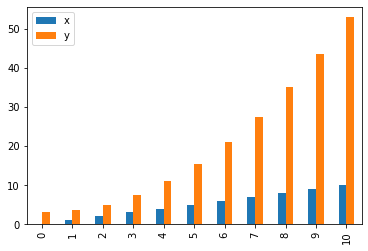

In [25]:
mydata.plot.bar()

#### `hist()` 

In [26]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


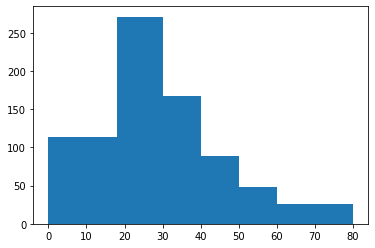

In [27]:
plt.hist('age', data=titanic.dropna(subset=['age']), bins=(0, 18, 30, 40, 50, 60, 80))
plt.show()

#### Annotation

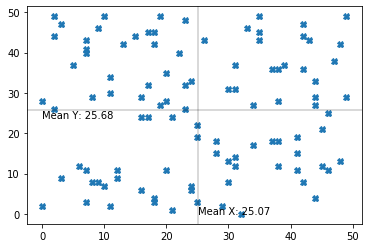

In [28]:
np.random.seed(7526012)
x = np.random.randint(0, 50, 100)
y = np.random.randint(0, 50, 100)
plt.plot(x, y, 'X')

xmean = x.mean()
ymean = y.mean()

plt.axvline(xmean, c='black', alpha=.2)
plt.axhline(ymean, c='black', alpha=.2)
plt.annotate('Mean X: '+str(xmean), (xmean, 0))
plt.annotate('Mean Y: '+str(ymean), (0, ymean-2))
plt.show()

#### Practice

Using your dataset (or one of the example datasets) generate two plots (scatter, bar, or histogram).

### Seaborn



In [29]:
tips['tip_pct'] = tips.tip/(tips.total_bill - tips.tip)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sexcat,daynum,mealnum,msize,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,1,6,0,8,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0,6,0,27,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0,6,0,27,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0,6,0,8,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,1,6,0,64,0.172069


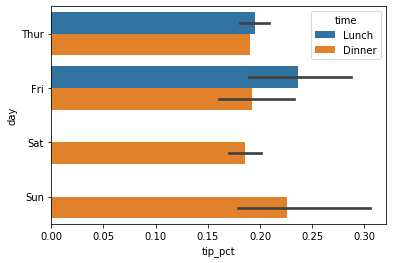

In [30]:
# "Set aesthetic parameters in one step." 
# https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set 
#sns.set()

sns.barplot('tip_pct', 'day', hue='time', data=tips)

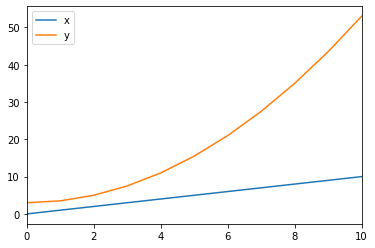

In [31]:
# seaborn.set() has also altered pyplot's default look:
mydata.plot()
plt.show()

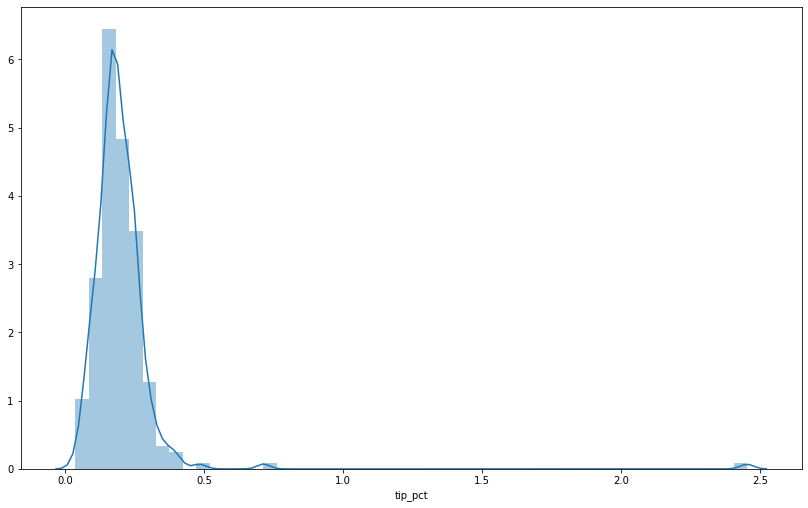

In [32]:
plt.figure(figsize=(14, 8.5))
# kde=False Hides the curve; hist=False hides the bars. 
sns.distplot(tips.tip_pct)
plt.show()

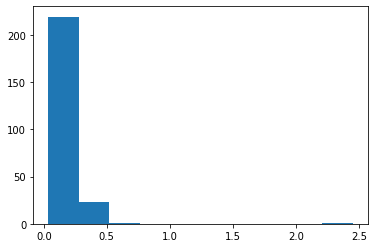

In [33]:
plt.hist(tips.tip_pct)
plt.show()

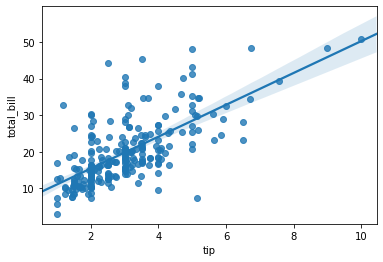

In [34]:
sns.regplot('tip', 'total_bill', data=tips)
plt.show()

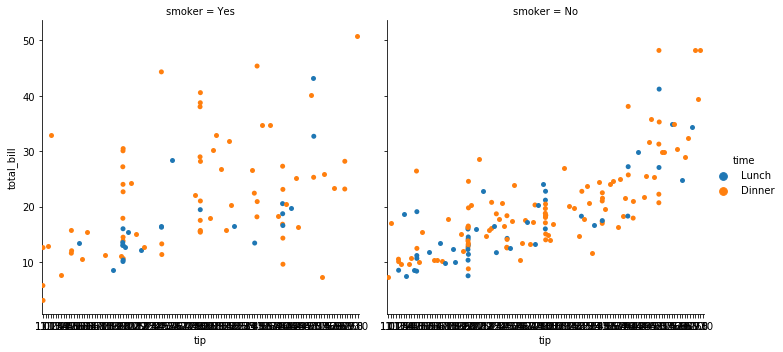

In [35]:
sns.catplot('tip', 'total_bill', hue='time', col='smoker', data=tips)
plt.show()

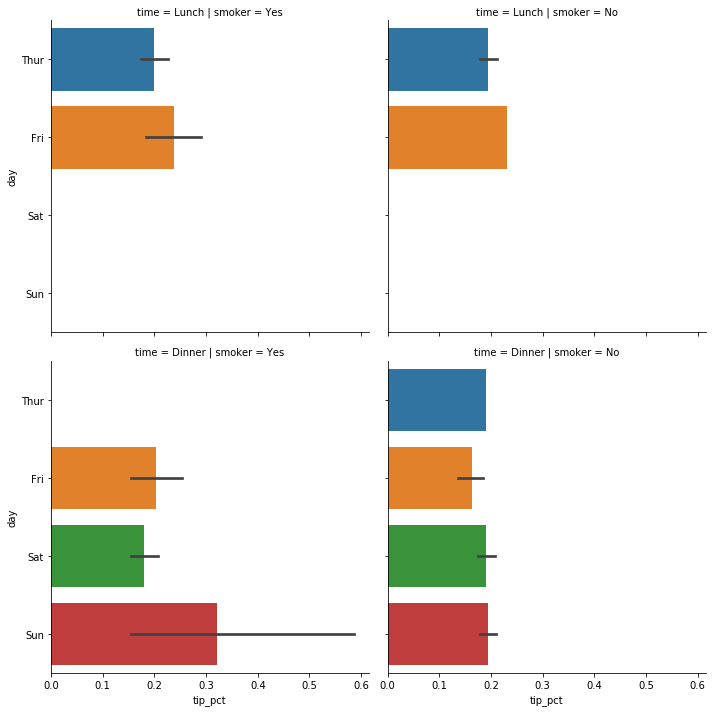

In [36]:
sns.catplot('tip_pct', 'day', row='time', col='smoker', data=tips, kind='bar')
plt.show()

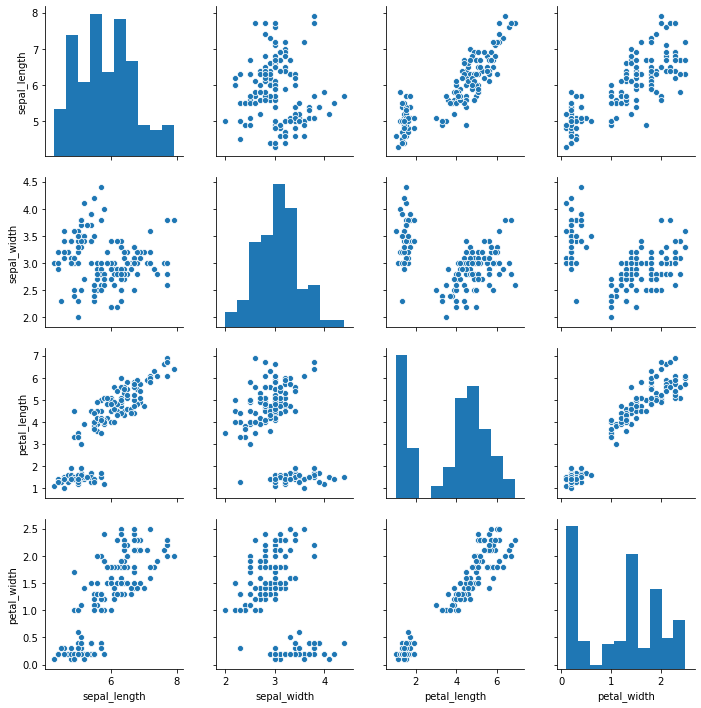

In [37]:
sns.pairplot(iris)

#### Practice

Generate 3 different plots using Seaborn (either from your data, or one of the example datasets).